# Practica 2 - MNist con NumPy

## Usando Numpy con MNist

MNist es un popular conjunto de datos que contiene imágenes de dígitos del 0-9 escritos a mano. Las imágenes en el conjunto están compuestas por 28x28 pixeles, cada pixel representa un tono en una escala de grises siendo 0 el valor más luminoso y 255 el valor más oscuro.

Unos ejemplos de las imágenes en MNist:

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Ejecuta la siguiente celda para importar las librerías utilizadas durante la notebook.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Una función auxiliar ```display_example``` para visualizar ejemplos en el conjunto de datos MNist.

*Nota: No olvides ejecutar la celda*

In [2]:
def display_example(x, example_width=None):
    """Muestra un ejemplo en forma 1D como una imagen"""
    # Compute rows, cols
    if x.ndim == 1:
        n = x.size
        m = 1
        x = x[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input x should be 1 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n // example_width

    plt.imshow(x[0].reshape(example_height, example_width),
                        cmap='Greys', extent=[0, 1, 0, 1])
    plt.show()

## Cargando los datos usando Numpy

Usarémos la función ```loadtxt``` para cargar una versión de MNist que está en nuestra máquina asignada por colab.

In [3]:
MNist = np.loadtxt("sample_data/mnist_train_small.csv", delimiter=',')
MNist

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

El conjunto de datos MNist en Colab está formado por imágenes de ejemplo. Cada ejemplo en el conjunto es una fila en el arreglo de NumPy.

Cada ejemplo (fila) es un arreglo con $785$ elementos, el primer elemento es la etiqueta del dígito (un entero de $0$ a $9$). El resto de los elementos ($784$) son los pixeles de la imágen ($28\times28 = 784$).

## ¿Cuántos ejemplos (filas) tenemos en el conjunto de datos?

Utiliza NumPy para calcular el número de filas en el set de datos, rellena el código para guardar el valor en la variable ```m```.

In [4]:
m = MNist.shape[0]# Ejemplos filas en el cjto de datos 
print("El set de datos contiene ", m, " ejemplos.") 

El set de datos contiene  20000  ejemplos.


## Separando los datos.

En la siguiente celda, deberás completar el código para separar el conjunto de datos en dos, un conjunto ```X``` que contendrá únicamente los pixeles de las imágenes y un conjunto ```y``` que contendrá las etiquetas asociadas al número que está en la imágen.

Utiliza slicing con NumPy para seleccionar los elementos adecuados.

In [5]:
MNist[0][784]

0.0

In [6]:
print(MNist.shape)
'''
En el cjto MNist cada fila contiene los píxeles de cada digito, 
en primera entrada de cada fila ([0]): se encuentra la etiqueta de cada dígito 
'''
X = MNist[:,1:] # Todas las filas empezando desde 0 y todas las columnas empezando desde 1. 
y = MNist[:,0] # Todas las filas empezando desde 0 y solo toma la primera columna ([0])
print(X.shape)
print(y.shape)

(20000, 785)
(20000, 784)
(20000,)


In [7]:
print(y[0]) # Etiqueta del dígito
print(X[0]) # Densidad de pixiles para dicho dígito 

6.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  24.  67.  67.  18.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 131. 252. 252.  66.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 159. 250. 232.  30.  32.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  

Comprueba ejecutando la siguiente celda:

In [8]:
assert y.shape == (20000,) and X.shape == (20000, 784), "Error en las dimensiones de X o y"
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (20000, 784)
y.shape: (20000,)


## Visualizando las imágenes en el set de datos

Usemos la función auxiliar display_example para visualizar los ejemplos en el set de datos. Intentar cambiar el valor de ```i``` para mostrar una ejemplo distinto.

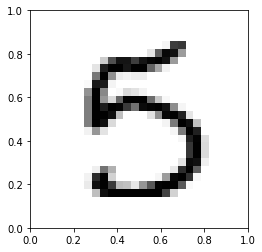

Imágen con etiqueta:  5.0


In [9]:
#puedes cambiar el valor de i
i = 4
example = X[i]
example_label = y[i]
display_example(example)
print("Imágen con etiqueta: ", example_label)

## Contando el número de ejemplos para cada "clase"

Rellena la función ```count_class_examples()``` para imprimir el número de ejemplos de cada etiqueta en el set de datos. Esto es, el número de ceros, de unos, dos, ..., nueves.

Para MNist las etiquetas $y \in \{0, 1, 2, \dots, 9\}$

In [10]:
y.shape

(20000,)

In [11]:
from numpy.core.numeric import count_nonzero
def count_class_examples(y):
  """Imprime el numero de ejemplos para cada clase en y.
  
  Argumentos
  y - arreglos de numpy que contiene etiquetas
  """
  suma = 0
  for i in range(10):
    count = np.count_nonzero(y==i) # Cuenta el número de veces cada que y es igual i.
    print("Numero de ", i, count)  # De manera alternativa np.suma(y==i) devueleve false o true, generando la suma.
    suma = suma + count
  print("El número total de la suma es:", suma)

In [12]:
count_class_examples(y)

Numero de  0 1962
Numero de  1 2243
Numero de  2 1989
Numero de  3 2021
Numero de  4 1924
Numero de  5 1761
Numero de  6 2039
Numero de  7 2126
Numero de  8 1912
Numero de  9 2023
El número total de la suma es: 20000


## Calcula el arreglo representativo para cada clase

Utiliza Numpy para encontrar el arreglo representativo promediando los arreglos para cada clase. Rellena la función ``` class_means``` para que devuelva un arreglo de NumPy que contenga en cada fila el arreglo promedio de los respectivos ejemplos (del dígito 0 al 9).

In [15]:
X.shape[1]

784

In [16]:
def class_means(X, y):
  """
  Calcula el arreglo promedio (representativo) de cada clase
  """
  # Numero de ejemplos (filas) (número de ejemplos: 20,000)
  m = X.shape[0]
  # Numero de features (columnas) (representación para cada pixel 28x28 = 784)
  n = X.shape[1]
  # Clases distintas en el set (cada digito, del 0 al 9, en total: 10) (arreglo o vector numpy)
  ulabels = np.unique(y)
  # Numero de clases (el numero total: 10, como escalar)
  classes = ulabels.size

  # Rellena means con el arreglo promedio de cada clase
  means = np.empty((classes, n))

  for i in range(classes):
    means[i,:] = np.mean(X[y == ulabels[i]],axis=0)

  return means

In [17]:
class_representatives = class_means(X, y)

#shape del arreglo que contiene los representativos
class_representatives.shape

(10, 784)

In [19]:
assert np.array_equal(class_means(np.array([[4, 6], [2, 4], [10, 4], [2, 6]]), np.array([1, 2, 1, 2])), np.array([[7, 5], [2, 5]])), "Error"
assert class_representatives.shape == (10, 784), "Error en las dimensiones de class_representatives"
print("Funcion clas_means es correcta")

Funcion clas_means es correcta


Utiliza la función ```display_example``` para mostrar el ejemplo promedio de la clase (para cada clase).

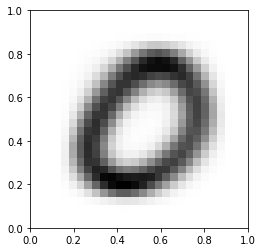

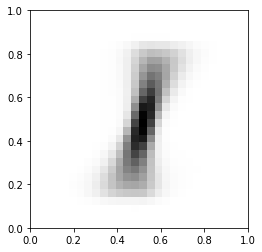

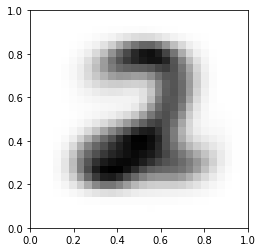

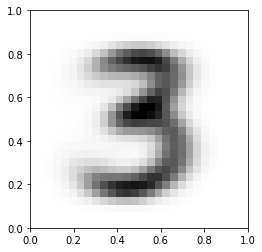

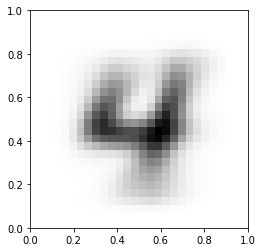

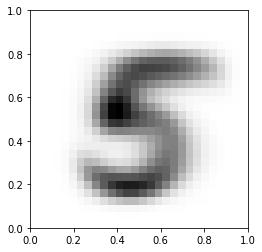

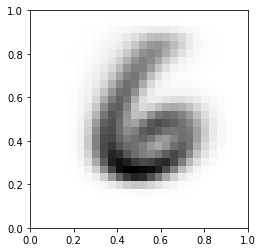

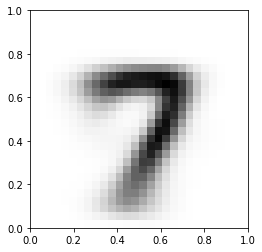

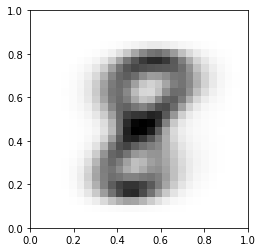

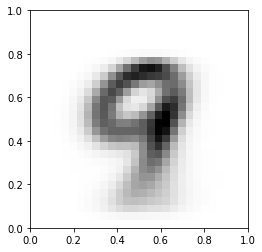

In [20]:
for i in range(10):
  display_example(class_representatives[i])

## Clasificador de dígitos usando distancias

En esta sección, generaremos un modelo para identificar dígitos mediante el uso de distancias euclidianas. Calcularemos la distancia entre cada ejemplo en el conjunto y los dígitos representativos de cada clase (el valor promedio de cada clase). Le asignaremos a cada ejemplo la etiqueta del dígito representativo con menor distancia.

### Distancia Euclidiana

En la siguiente celda, rellena la función ```euclidean_distance``` para calcular la distancia euclidiana entre los puntos P y Q.

La distancia euclidiana entre dos puntos P y Q en un espacio n-dimesional es:

$$d_e(P, Q) = \sqrt{(p_1 - q_1)^2+(p_2-q_2)^2 + \dots+(p_n-q_n)^2} = \sqrt{\sum_{i=1}^{n}(p_i-q_i)^2} $$

In [21]:
def euclidean_distance(P, Q):
  """
  Calcula la distancia euclidiana entre los elementos de P y Q
  """
  #e_distance = []
  e_distance = np.sqrt(np.sum((P-Q)**2,axis=1))
  '''
  Forma alternativa 
  #e_distance = []
  e_distance = np.linalg.norm(P-Q,axis=1)
  '''
  return e_distance

In [22]:
a = np.array([[1, 2, 3]])
b = np.array([[3, 3, 5]])
euclidean_distance(a, b)

array([3.])

In [23]:
assert euclidean_distance(np.array([[1, 2, 3]]), np.array([[3, 3, 5]]))[0] == 3.0, "Error en euclidean_distance"

## Obten el representante más cercano para cada ejemplo

Rellena la función ```closest_point``` para asignar a cada ejemplo la etiqueta del dígito más cercano según su distancia al arreglo representativo.

*¿Puedes hacerlo con 2, 1 o ningún ciclo for?*

In [25]:
from numpy.core.fromnumeric import argmin
def closest_point(X, representatives):
  """
  Devuelve un arreglo con la etiqueta del elemento mas cercano
  para cada ejemplo en X

  X -  el arreglo con los ejemplos
  representatives - el arreglo con los elementos representativos de cada clase
  """
  # Numero de ejemplos (filas)
  m = X.shape[0]
  # Numero de features (columnas)
  n = X.shape[1]
  # Numero de clases
  classes = representatives.shape[0]

  # Distancias minimas
  min_distances = np.full(m, np.inf)
  # El indice de la mejor distancia
  best = np.zeros((X.shape[0]), dtype=np.int8)
  #Forma 1 
  """
  for i in range(len(X)):
    dist = []
    for j in range(classes):
      dist.append(euclidean_distance(X[i],representatives[j]))
    best[i] = np.argmin(dist)
    """
  #Forma 2
  for i in range(len(X)):
      dist = euclidean_distance(X[i],representatives)
      best[i] = np.argmin(dist)
  return best

In [26]:
euclidean_distance(X[0],class_representatives).shape

(10,)

In [28]:
print(X[1].shape)#,class_representatives)
print(class_representatives.shape)
print(type(X[1]))#,class_representatives)
print(type(class_representatives))

(784,)
(10, 784)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
print(X.shape)
print(class_representatives.shape)

(20000, 784)
(10, 784)


In [30]:
euclidean_distance(X[0],class_representatives)

array([2259.01805843, 2374.81362331, 2101.44065328, 2404.50425437,
       2208.2295468 , 2347.94192797, 2237.22155626, 2326.54105805,
       2276.16353247, 2329.8139513 ])

In [31]:
print(X.shape)
print(class_representatives.shape)

(20000, 784)
(10, 784)


In [32]:
y_pred = closest_point(X, class_representatives)

In [33]:
assert y_pred.shape == (20000,) or y_pred.shape == (20000), "Error en las dimensiones de y_pred"

## Visualiza las predicciones

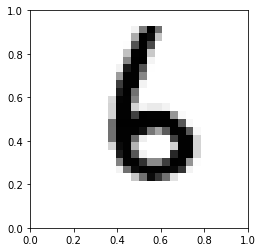

Imágen con etiqueta:  6.0  modelo dice: 6


In [34]:
#intenta cambiar el valor de i
i =231

example = X[i]
pred_label = y_pred[i]
true_label = y[i]
display_example(example)
print("Imágen con etiqueta: ", true_label, " modelo dice:", pred_label)

## Evaluando el clasificador

Una vez que tienes un modelo, debes evaluarlo para saber que tan bien (o mal) está haciendo su trabajo. Para el modelo clasificador de dígitos, usaremos una métrica típica de evaluación.

## Exactitúd (Accuracy)

La exactitúd o accuracy mide el rendimiento general del modelo.

Utiliza la siguiente fórmula para completar la función ```accuracy``` para medir el rendimiento del modelo de clasificación de dígitos:

$$\texttt{accuracy}(y, \hat{y}) = \frac{1}{m} \sum_{i=0}^{m-1} 1(\hat{y}_i = y_i)$$

$$ 1(\hat{y}_i = y_i) = 1 \quad \text{cuando} \quad \hat{y}_i = y_i$$

$$ 1(\hat{y}_i = y_i) = 0 \quad \text{cuando} \quad \hat{y}_i \neq y_i$$

$$m \quad \text{es el número de ejemplos}$$

In [35]:
def accuracy(y, y_pred):
  """
  Devuelve la exactitud dados dos vectores "y" con la verdad
  y "y_pred" con las predicciones
  """
  m = y.shape
  acc = 1/len(y)*np.sum(y==y_pred)
  return acc

In [36]:
accuracy(y, y_pred)

0.80925

¿Consideras que el modelo es bueno para predecir dígitos escritos a mano?, ¿crees que hay margen de mejora?

Se podría mejorar el prototipo, no solo usar el promedio.

Usar diferentes métricas, etc.

Se puede hacer diferentes formas y algoritmos, pero dado los datos no tiene relevancia mejorar los prototipos. 